#### Imports

In [1]:
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import rdMolTransforms as rmt
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import datamol as dm

from src.data.datasets import *
from rdkit.Chem import rdMolTransforms as rmt
from rdkit.Chem import rdMolDescriptors

## Main

In [37]:
targetdiff = get_dataset("targetdiff")

In [43]:
class DockedMolsDataset(TargetDiffSamples):
    def __init__(self, name, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.name = name
        self.data = torch.load(os.path.join(self.ligand_dir, f"{name}_vina_docked.pt"))

    def __repr__(self) -> str:
        return f"{self.name}_docked"

In [44]:
ar_docked = DockedMolsDataset("ar")

In [55]:
mols = [ar_docked.data[0][i]["mol"] for i in range(99)]

In [57]:
dm.to_sdf(mols, "ar_docked.sdf")

In [51]:
ar_docked.data[0][0]["vina"]["dock"][0]

{'affinity': -3.529,
 'pose': 'MODEL 1\nREMARK VINA RESULT:    -3.529      0.000      0.000\nREMARK INTER + INTRA:          -3.942\nREMARK INTER:                  -3.942\nREMARK INTRA:                   0.000\nREMARK UNBOUND:                 0.000\nREMARK Flexibility Score: inf\nREMARK Active torsions [ 4 ] -> [ 4 ]\nROOT\nATOM      1  S1  LIG L   1      25.202  33.923 107.198  1.00  0.00     0.036 SA\nENDROOT\nBRANCH    1    2\nATOM      2  O1  LIG L   1      25.595  35.012 106.309  1.00  0.00    -0.254 OA\nATOM      3  H1  LIG L   1      25.557  35.870 106.802  1.00  0.00     0.245 HD\nENDBRANCH    1    2\nBRANCH    1    4\nATOM      4  O2  LIG L   1      24.831  32.716 106.692  1.00  0.00    -0.254 OA\nATOM      5  H2  LIG L   1      24.130  32.319 107.267  1.00  0.00     0.245 HD\nENDBRANCH    1    4\nBRANCH    1    6\nATOM      6  O3  LIG L   1      24.822  34.435 108.511  1.00  0.00    -0.254 OA\nATOM      7  H3  LIG L   1      23.901  34.795 108.470  1.00  0.00     0.245 HD\nEND

In [10]:
data = targetdiff.data
sample = data[0][0]

In [58]:
sample

{'mol': <rdkit.Chem.rdchem.Mol at 0x112547650>,
 'smiles': 'CC(C)C1CC(=C=CC=NC=N)C(CC2CC(=O)C3C(CCC(O)(O)C3O)C2)C(CO)NC1=O',
 'ligand_filename': 'BSD_ASPTE_1_130_0/2z3h_A_rec_1wn6_bst_lig_tt_docked_3.sdf',
 'pred_pos': array([[ 28.64857674,  34.2102356 , 103.89121246],
        [ 22.26242256,  33.43259048, 107.04077148],
        [ 32.12720108,  33.9423027 , 101.70831299],
        [ 25.26725006,  34.27240372, 105.61209869],
        [ 23.24348831,  32.85912323, 104.86436462],
        [ 29.7340126 ,  35.09168625, 103.92012787],
        [ 28.01941681,  36.88599777, 104.40847778],
        [ 24.90070724,  35.34159851, 101.42758942],
        [ 21.34413528,  31.38601875, 105.78197479],
        [ 25.86146164,  34.40193176, 107.82698059],
        [ 25.07189178,  34.65364838, 108.94551086],
        [ 21.00190163,  30.91161919, 104.3117218 ],
        [ 26.43770218,  34.90323257, 105.10548401],
        [ 23.45197296,  34.14904785, 107.172966  ],
        [ 25.23684692,  34.90486145, 102.56072235],
  

In [13]:
sample.keys()

dict_keys(['mol', 'smiles', 'ligand_filename', 'pred_pos', 'pred_v', 'chem_results', 'vina'])

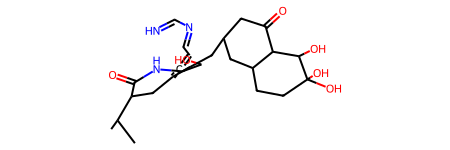

In [38]:
mol = sample["mol"]
mol

In [40]:
mols = [sample["mol"] for sample in data[0]]

In [42]:
dm.to_sdf(mols, "targetdiff_test.sdf")

In [14]:
sample["vina"]

{'score_only': [{'affinity': -7.489, 'pose': None}],
 'minimize': [{'affinity': -8.39,
   'pose': 'REMARK Flexibility Score: inf\nREMARK Active torsions [ 10 ] -> [ 10 ]\nROOT\nATOM      1  C1  LIG L   1      22.214  33.380 106.899  1.00  0.00     0.217 C \nATOM      2  C2  LIG L   1      25.247  34.191 105.515  1.00  0.00     0.045 C \nATOM      3  C3  LIG L   1      23.238  32.764 104.753  1.00  0.00     0.052 C \nATOM      4  N1  LIG L   1      23.401  34.099 107.041  1.00  0.00    -0.309 N \nATOM      5  C4  LIG L   1      25.279  34.765 102.452  1.00  0.00     0.071 C \nATOM      6  C5  LIG L   1      24.804  33.977 106.807  1.00  0.00     0.106 C \nATOM      7  O1  LIG L   1      21.019  33.796 107.289  1.00  0.00    -0.275 OA\nATOM      8  C6  LIG L   1      24.709  34.029 103.303  1.00  0.00    -0.119 C \nATOM      9  C7  LIG L   1      24.337  33.648 104.531  1.00  0.00    -0.022 C \nATOM     10  C8  LIG L   1      22.078  32.602 105.628  1.00  0.00     0.082 C \nATOM     11  

In [106]:
pose = sample["vina"]["dock"][0]["pose"]

In [109]:
pose

'MODEL 1\nREMARK VINA RESULT:    -9.047      0.000      0.000\nREMARK INTER + INTRA:         -12.659\nREMARK INTER:                 -13.278\nREMARK INTRA:                   0.619\nREMARK UNBOUND:                 0.619\nREMARK Flexibility Score: inf\nREMARK Active torsions [ 10 ] -> [ 10 ]\nROOT\nATOM      1  C1  LIG L   1      22.160  33.183 106.663  1.00  0.00     0.217 C \nATOM      2  C2  LIG L   1      25.203  34.094 105.363  1.00  0.00     0.045 C \nATOM      3  C3  LIG L   1      23.217  32.691 104.501  1.00  0.00     0.052 C \nATOM      4  N1  LIG L   1      23.339  33.904 106.858  1.00  0.00    -0.309 N \nATOM      5  C4  LIG L   1      25.267  34.830 102.335  1.00  0.00     0.071 C \nATOM      6  C5  LIG L   1      24.746  33.808 106.636  1.00  0.00     0.106 C \nATOM      7  O1  LIG L   1      20.956  33.566 107.059  1.00  0.00    -0.275 OA\nATOM      8  C6  LIG L   1      24.693  34.044 103.139  1.00  0.00    -0.119 C \nATOM      9  C7  LIG L   1      24.310  33.595 104.340 

In [110]:
dm.read_sdf("test.sdf")

[]

In [112]:
# write pose to sdf
for line in pose.split("\n"):
    print(line)

MODEL 1
REMARK VINA RESULT:    -9.047      0.000      0.000
REMARK INTER + INTRA:         -12.659
REMARK INTER:                 -13.278
REMARK INTRA:                   0.619
REMARK UNBOUND:                 0.619
REMARK Flexibility Score: inf
REMARK Active torsions [ 10 ] -> [ 10 ]
ROOT
ATOM      1  C1  LIG L   1      22.160  33.183 106.663  1.00  0.00     0.217 C 
ATOM      2  C2  LIG L   1      25.203  34.094 105.363  1.00  0.00     0.045 C 
ATOM      3  C3  LIG L   1      23.217  32.691 104.501  1.00  0.00     0.052 C 
ATOM      4  N1  LIG L   1      23.339  33.904 106.858  1.00  0.00    -0.309 N 
ATOM      5  C4  LIG L   1      25.267  34.830 102.335  1.00  0.00     0.071 C 
ATOM      6  C5  LIG L   1      24.746  33.808 106.636  1.00  0.00     0.106 C 
ATOM      7  O1  LIG L   1      20.956  33.566 107.059  1.00  0.00    -0.275 OA
ATOM      8  C6  LIG L   1      24.693  34.044 103.139  1.00  0.00    -0.119 C 
ATOM      9  C7  LIG L   1      24.310  33.595 104.340  1.00  0.00    -0.

In [108]:
pose.split("\n")

['MODEL 1',
 'REMARK VINA RESULT:    -9.047      0.000      0.000',
 'REMARK INTER + INTRA:         -12.659',
 'REMARK INTER:                 -13.278',
 'REMARK INTRA:                   0.619',
 'REMARK UNBOUND:                 0.619',
 'REMARK Flexibility Score: inf',
 'REMARK Active torsions [ 10 ] -> [ 10 ]',
 'ROOT',
 'ATOM      1  C1  LIG L   1      22.160  33.183 106.663  1.00  0.00     0.217 C ',
 'ATOM      2  C2  LIG L   1      25.203  34.094 105.363  1.00  0.00     0.045 C ',
 'ATOM      3  C3  LIG L   1      23.217  32.691 104.501  1.00  0.00     0.052 C ',
 'ATOM      4  N1  LIG L   1      23.339  33.904 106.858  1.00  0.00    -0.309 N ',
 'ATOM      5  C4  LIG L   1      25.267  34.830 102.335  1.00  0.00     0.071 C ',
 'ATOM      6  C5  LIG L   1      24.746  33.808 106.636  1.00  0.00     0.106 C ',
 'ATOM      7  O1  LIG L   1      20.956  33.566 107.059  1.00  0.00    -0.275 OA',
 'ATOM      8  C6  LIG L   1      24.693  34.044 103.139  1.00  0.00    -0.119 C ',
 'ATO

In [107]:
mol = Chem.MolFromMolBlock(pose)

[10:35:58] Cannot convert 'REM' to unsigned int on line 4


In [84]:
pose

'REMARK Flexibility Score: inf\nREMARK Active torsions [ 10 ] -> [ 10 ]\nROOT\nATOM      1  C1  LIG L   1      22.214  33.380 106.899  1.00  0.00     0.217 C \nATOM      2  C2  LIG L   1      25.247  34.191 105.515  1.00  0.00     0.045 C \nATOM      3  C3  LIG L   1      23.238  32.764 104.753  1.00  0.00     0.052 C \nATOM      4  N1  LIG L   1      23.401  34.099 107.041  1.00  0.00    -0.309 N \nATOM      5  C4  LIG L   1      25.279  34.765 102.452  1.00  0.00     0.071 C \nATOM      6  C5  LIG L   1      24.804  33.977 106.807  1.00  0.00     0.106 C \nATOM      7  O1  LIG L   1      21.019  33.796 107.289  1.00  0.00    -0.275 OA\nATOM      8  C6  LIG L   1      24.709  34.029 103.303  1.00  0.00    -0.119 C \nATOM      9  C7  LIG L   1      24.337  33.648 104.531  1.00  0.00    -0.022 C \nATOM     10  C8  LIG L   1      22.078  32.602 105.628  1.00  0.00     0.082 C \nATOM     11  H1  LIG L   1      23.198  35.022 107.449  1.00  0.00     0.149 HD\nENDROOT\nBRANCH    2   12\nATO

In [61]:
len(pose)

3883

In [80]:
mol = sample["mol"]

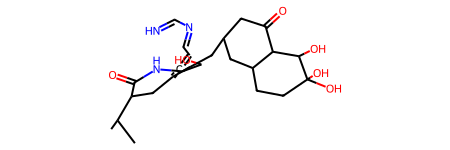

In [82]:
sample["mol"]

In [92]:
sample["pred_pos"].shape

(34, 3)

In [105]:
mol = Chem.MolFromMolBlock(pose)

[10:35:37] Cannot convert 'ATO' to unsigned int on line 4


In [93]:
# print atom types
for atom in mol.GetAtoms():
    print(atom.GetSymbol())

C
C
O
C
C
C
C
C
C
C
O
C
C
N
C
N
C
O
C
C
C
O
C
N
C
C
C
C
C
C
O
C
C
O


In [81]:
sample["pred_pos"]

array([[ 28.64857674,  34.2102356 , 103.89121246],
       [ 22.26242256,  33.43259048, 107.04077148],
       [ 32.12720108,  33.9423027 , 101.70831299],
       [ 25.26725006,  34.27240372, 105.61209869],
       [ 23.24348831,  32.85912323, 104.86436462],
       [ 29.7340126 ,  35.09168625, 103.92012787],
       [ 28.01941681,  36.88599777, 104.40847778],
       [ 24.90070724,  35.34159851, 101.42758942],
       [ 21.34413528,  31.38601875, 105.78197479],
       [ 25.86146164,  34.40193176, 107.82698059],
       [ 25.07189178,  34.65364838, 108.94551086],
       [ 21.00190163,  30.91161919, 104.3117218 ],
       [ 26.43770218,  34.90323257, 105.10548401],
       [ 23.45197296,  34.14904785, 107.172966  ],
       [ 25.23684692,  34.90486145, 102.56072235],
       [ 25.21239662,  36.42338181, 100.83914185],
       [ 24.85019875,  34.03287506, 106.90937042],
       [ 21.07470703,  33.83969498, 107.46297455],
       [ 22.27993011,  30.15244484, 106.12352753],
       [ 28.86818695,  32.98558

In [102]:
pose.split("\n")

['REMARK Flexibility Score: inf',
 'REMARK Active torsions [ 10 ] -> [ 10 ]',
 'ROOT',
 'ATOM      1  C1  LIG L   1      22.214  33.380 106.899  1.00  0.00     0.217 C ',
 'ATOM      2  C2  LIG L   1      25.247  34.191 105.515  1.00  0.00     0.045 C ',
 'ATOM      3  C3  LIG L   1      23.238  32.764 104.753  1.00  0.00     0.052 C ',
 'ATOM      4  N1  LIG L   1      23.401  34.099 107.041  1.00  0.00    -0.309 N ',
 'ATOM      5  C4  LIG L   1      25.279  34.765 102.452  1.00  0.00     0.071 C ',
 'ATOM      6  C5  LIG L   1      24.804  33.977 106.807  1.00  0.00     0.106 C ',
 'ATOM      7  O1  LIG L   1      21.019  33.796 107.289  1.00  0.00    -0.275 OA',
 'ATOM      8  C6  LIG L   1      24.709  34.029 103.303  1.00  0.00    -0.119 C ',
 'ATOM      9  C7  LIG L   1      24.337  33.648 104.531  1.00  0.00    -0.022 C ',
 'ATOM     10  C8  LIG L   1      22.078  32.602 105.628  1.00  0.00     0.082 C ',
 'ATOM     11  H1  LIG L   1      23.198  35.022 107.449  1.00  0.00     

In [96]:
from rdkit.Geometry import Point3D

In [97]:
lines = pose.split("\n")
lines = [line for line in lines if line.startswith("ATOM")]

# remove hyodrogen atoms
lines = [line for line in lines if not line[12:14].strip().startswith("H")]

# get coords
coords = []
for line in lines:
    coords.append([float(line[30:38]), float(line[38:46]), float(line[46:54])])

conformer = mol.GetConformer()

# Set mol coords to pose coords
for i, atom in enumerate(mol.GetAtoms()):
    new_coord = Point3D(coords[i][0], coords[i][1], coords[i][2])
    conformer.SetAtomPosition(i, new_coord)

In [104]:
sdf_string = "<your SDF string here>"

# Create an RDKit molecule from the SDF string
mol = Chem.MolFromMolBlock(pose)

[10:35:05] Cannot convert 'ATO' to unsigned int on line 4


In [99]:
lines

['ATOM      1  C1  LIG L   1      22.214  33.380 106.899  1.00  0.00     0.217 C ',
 'ATOM      2  C2  LIG L   1      25.247  34.191 105.515  1.00  0.00     0.045 C ',
 'ATOM      3  C3  LIG L   1      23.238  32.764 104.753  1.00  0.00     0.052 C ',
 'ATOM      4  N1  LIG L   1      23.401  34.099 107.041  1.00  0.00    -0.309 N ',
 'ATOM      5  C4  LIG L   1      25.279  34.765 102.452  1.00  0.00     0.071 C ',
 'ATOM      6  C5  LIG L   1      24.804  33.977 106.807  1.00  0.00     0.106 C ',
 'ATOM      7  O1  LIG L   1      21.019  33.796 107.289  1.00  0.00    -0.275 OA',
 'ATOM      8  C6  LIG L   1      24.709  34.029 103.303  1.00  0.00    -0.119 C ',
 'ATOM      9  C7  LIG L   1      24.337  33.648 104.531  1.00  0.00    -0.022 C ',
 'ATOM     10  C8  LIG L   1      22.078  32.602 105.628  1.00  0.00     0.082 C ',
 'ATOM     12  C9  LIG L   1      26.429  34.812 105.019  1.00  0.00     0.014 C ',
 'ATOM     13 C10  LIG L   1      27.088  35.730 104.556  1.00  0.00    -0.0

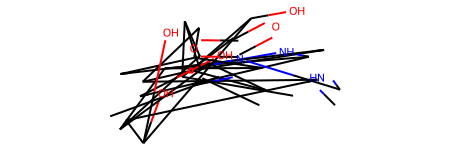

In [98]:
mol